Задание 1

1.1 Метод сумм

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

Для начала построим гистограмму выборки из 1000 равномерно распределённых СВ и поверх неё нарисуем теоретическую функцию распределения

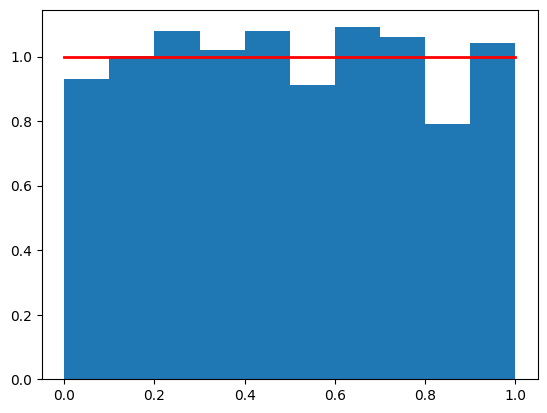

In [2]:
numbers = np.random.uniform(0, 1, 1000)
count, bins, ignored = plt.hist(numbers, 10, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

Теперь оценим распределение выборочного среднего нашей СВ при разных объёмах выборок (2, 5, 10, 50)

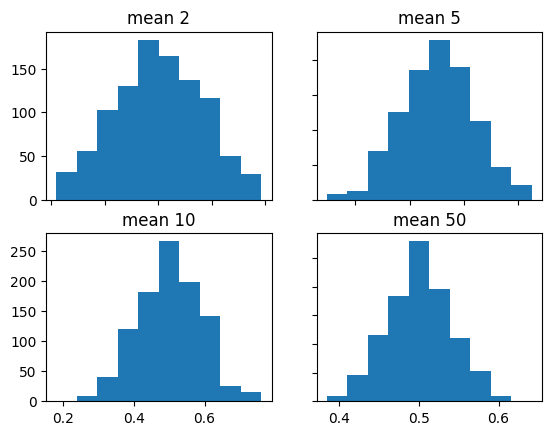

In [3]:
samplings2 = np.random.uniform(0, 1, (1000, 2))
samplings5 = np.random.uniform(0, 1, (1000, 5))
samplings10 = np.random.uniform(0, 1, (1000, 10))
samplings50 = np.random.uniform(0, 1, (1000, 50))
mean2 = np.fromiter((statistics.mean(samplings2[i]) for i in range(1000)), float)
mean5 = np.fromiter((statistics.mean(samplings5[i]) for i in range(1000)), float)
mean10 = np.fromiter((statistics.mean(samplings10[i]) for i in range(1000)), float)
mean50 = np.fromiter((statistics.mean(samplings50[i]) for i in range(1000)), float)
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(mean2)
axs[0, 0].set_title('mean 2')
axs[0, 1].hist(mean5)
axs[0, 1].set_title('mean 5')
axs[1, 0].hist(mean10)
axs[1, 0].set_title('mean 10')
axs[1, 1].hist(mean50)
axs[1, 1].set_title('mean 50')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Оценим параметры исходного и всех полученных распределений

In [4]:
print('uniform mean: ', statistics.mean(samplings50[0]))
print('uniform variance: ', statistics.variance(samplings50[0]))

print('normal mean 2: ', statistics.mean(mean2))
print('normal variance 2: ', statistics.variance(mean2))
print('normal mean 5: ', statistics.mean(mean5))
print('normal variance 5: ', statistics.variance(mean5))
print('normal mean 10: ', statistics.mean(mean10))
print('normal variance 10: ', statistics.variance(mean10))
print('normal mean 50: ', statistics.mean(mean50))
print('normal variance 50: ', statistics.variance(mean50))

uniform mean:  0.5098794500307755
uniform variance:  0.07488917166973925
normal mean 2:  0.5024518386383863
normal variance 2:  0.04195818645203112
normal mean 5:  0.5038269318758699
normal variance 5:  0.017196552255988345
normal mean 10:  0.501778105610907
normal variance 10:  0.007908373251480342
normal mean 50:  0.5015750391105556
normal variance 50:  0.0016046084287236828


1.2 Метод Бокса-Мюллера

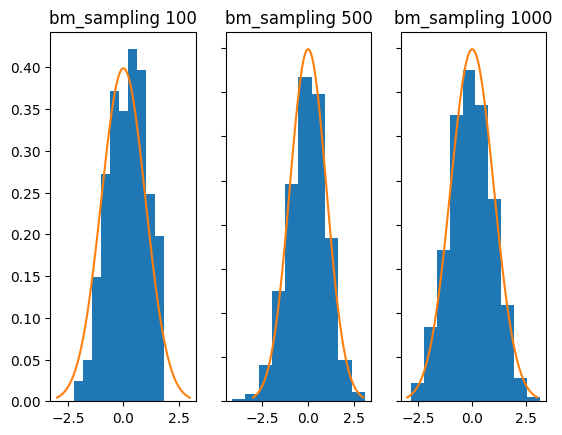

In [5]:
saved_value = None

def normal_density(x, a=0, sigma=1):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - a) * (x - a) / (2 * sigma * sigma))

def box_muller():
    global saved_value
    if saved_value is not None:
        value = saved_value
        saved_value = None
        return value
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    s = x * x + y * y
    while s == 0 or s >= 1:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        s = x * x + y * y
    z_0 = x * math.sqrt(-2 * math.log(s) / s)
    z_1 = y * math.sqrt(-2 * math.log(s) / s)    
    if saved_value is None:
        saved_value = z_1
    return z_0

bm_sampling100 = np.zeros(100)
bm_sampling500 = np.zeros(500)
bm_sampling1000 = np.zeros(1000)
for i in range(100):
    bm_sampling100[i] = box_muller()
for i in range(500):
    bm_sampling500[i] = box_muller()  
for i in range(1000):
    bm_sampling1000[i] = box_muller()       

fig, axs = plt.subplots(1, 3)
x_values = np.linspace(-3, 3, 100)
calculated_density = [normal_density(x) for x in x_values]
axs[0].hist(bm_sampling100, density=True)
axs[0].plot(x_values, calculated_density)
axs[0].set_title('bm_sampling 100')
axs[1].hist(bm_sampling500, density=True)
axs[1].plot(x_values, calculated_density)
axs[1].set_title('bm_sampling 500')
axs[2].hist(bm_sampling1000, density=True)
axs[2].plot(x_values, calculated_density)
axs[2].set_title('bm_sampling 1000')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Задание 2

Моделирование аддитивных случайных блужданий

In [30]:
N = 8
T = 15 + N
sigma = 0.1
experiments = [[] for i in range(23)]
for k in range(100):
    x = N
    for i in range(T):
        x += sigma * box_muller()
        experiments[i].append(x)
print(experiments[0])

[6.997523730616869, 6.981438032969064, 7.068787022097507, 7.004613829980444, 6.94247080159441, 7.020862768503883, 7.110708261657247, 6.935677847400612, 7.090518166431441, 6.9636255405369125, 6.885658819302543, 7.045217730145644, 7.016877751435625, 7.020833374018656, 6.922195595770501, 6.893572625889436, 6.838065820579806, 7.182430772665427, 6.960541826613421, 6.98548156397212, 6.963039500728634, 6.947964838721575, 6.843438809695473, 6.965051156187423, 6.916943629193317, 7.216532421700112, 6.7678062488101824, 6.8780010887223435, 6.943055978999399, 7.042778372261219, 6.8705691263608815, 6.990464671905322, 6.957353619150654, 6.926051767910297, 6.8837387008340984, 6.900775795951963, 7.057547268715396, 6.922868142473508, 7.0354204486591305, 6.913993037699298, 7.027136061373742, 7.062928138932991, 6.906654787691393, 6.859942524377484, 7.062045519850981, 6.952195418843179, 7.023619659406015, 7.002580229695249, 7.119689986289939, 7.100085095573762, 6.925768469167415, 6.9712631534249025, 7.1705

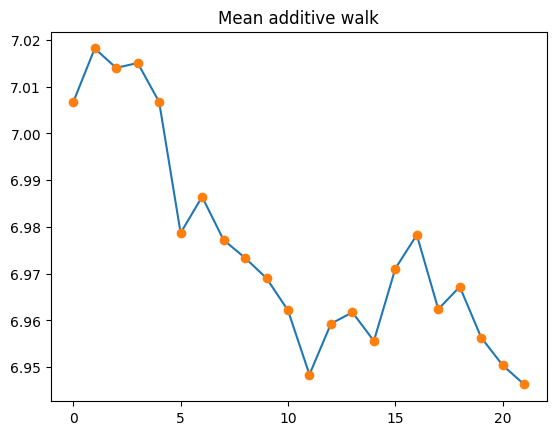

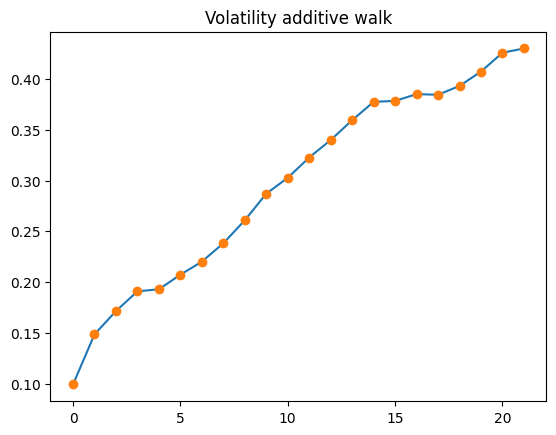

In [34]:
#Вычисляем выборочные средние и выборочные дисперсии для каждого эксперимента
experiments_mean = np.fromiter((statistics.mean(experiments[i]) for i in range(23)), float)
experiments_volatility = np.fromiter((math.sqrt(statistics.variance(experiments[i])) for i in range(23)), float)
plt.plot(experiments_mean)
plt.plot(experiments_mean, 'o')
plt.title(label='Mean additive walk')
plt.show()
plt.plot(experiments_volatility)
plt.plot(experiments_volatility, 'o')
plt.title(label='Volatility additive walk')
plt.show()

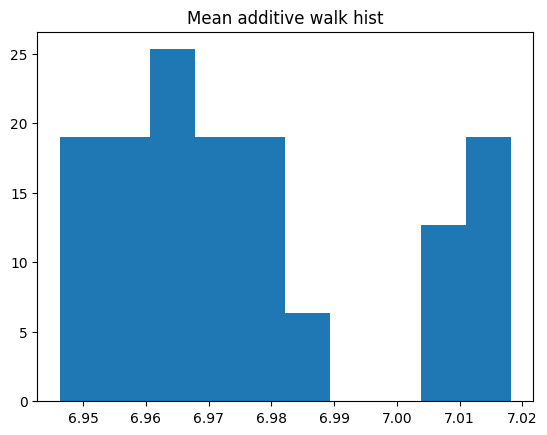

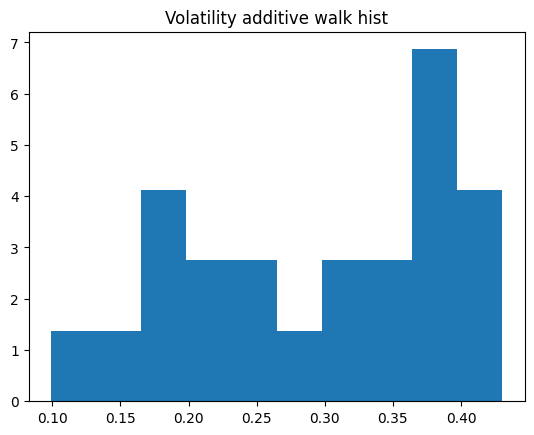

In [35]:
plt.hist(experiments_mean, density=True)
plt.title(label='Mean additive walk hist')
plt.show()

plt.hist(experiments_volatility, density=True)
plt.title(label='Volatility additive walk hist')
plt.show()

In [36]:
#Винеровский процесс
experiments = [[] for i in range(23)]
for k in range(100):
    x_0 = N
    for i in range(T):
        W_i = box_muller() * math.sqrt(i)
        x = x_0 + sigma * W_i
        experiments[i].append(x)

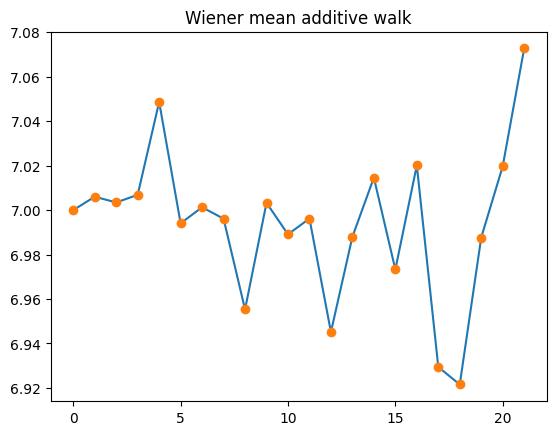

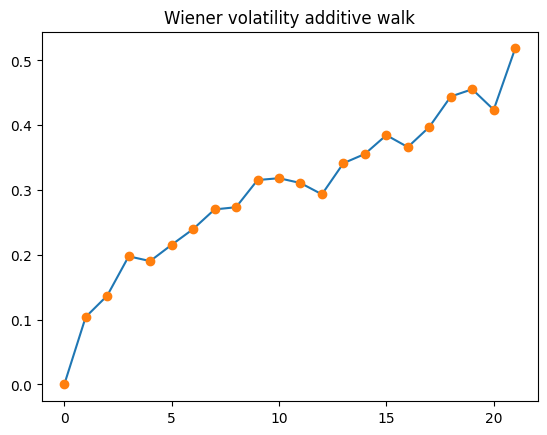

In [37]:
#Вычисляем выборочные средние и выборочные дисперсии для каждого эксперимента
experiments_mean = np.fromiter((statistics.mean(experiments[i]) for i in range(23)), float)
experiments_volatility = np.fromiter((math.sqrt(statistics.variance(experiments[i])) for i in range(23)), float)
plt.plot(experiments_mean)
plt.plot(experiments_mean, 'o')
plt.title(label='Wiener mean additive walk')
plt.show()
plt.plot(experiments_volatility)
plt.plot(experiments_volatility, 'o')
plt.title(label='Wiener volatility additive walk')
plt.show()

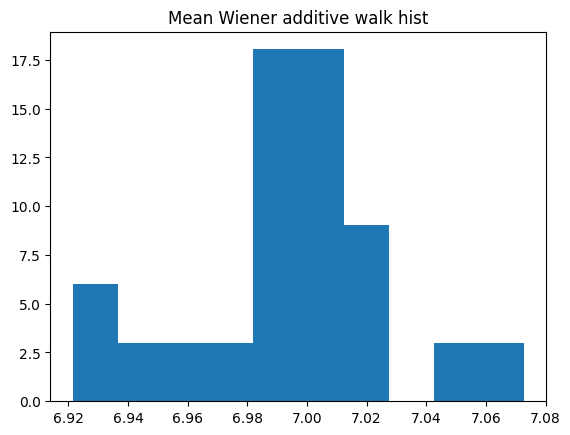

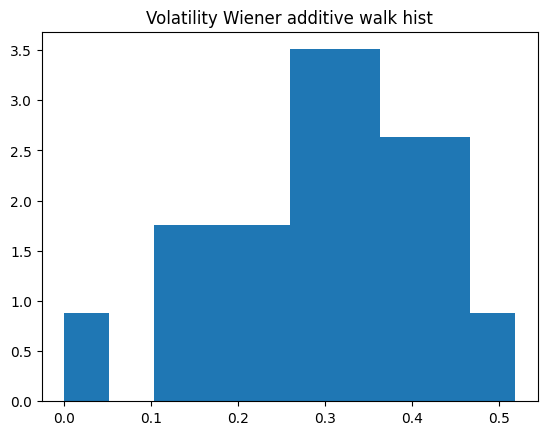

In [38]:
plt.hist(experiments_mean, density=True)
plt.title(label='Mean Wiener additive walk hist')
plt.show()

plt.hist(experiments_volatility, density=True)
plt.title(label='Volatility Wiener additive walk hist')
plt.show()

coeffs [ 7.00103798e+00 -6.50288579e-04]


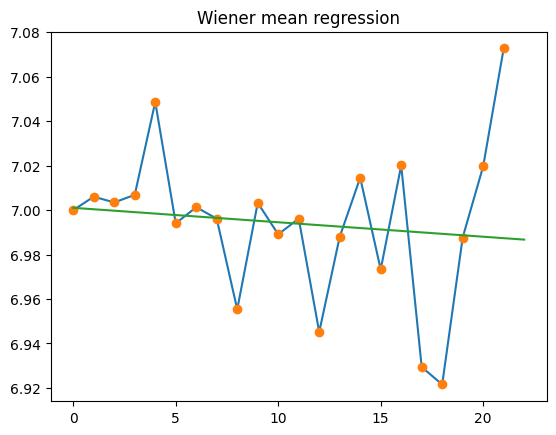

In [39]:
def y_regression(t, coeffs):
    return coeffs[0] + coeffs[1] * t

sum_t_i = 0
sum_y_i = np.sum(experiments_mean)
sum_t_i_t_i = 0
sum_t_i_y_i = 0
for i in range(23):
    sum_t_i += i
    sum_t_i_t_i += i * i
    sum_t_i_y_i += i * experiments_mean[i]

matrix = np.array([[23, sum_t_i], [sum_t_i, sum_t_i_t_i]])
vector = np.array([sum_y_i, sum_t_i_y_i])
coeffs = np.linalg.solve(matrix, vector)
print('coeffs', coeffs)

t_values = np.linspace(0, 23, 1000)
y_values = y_regression(t_values, coeffs)
plt.plot(experiments_mean)
plt.plot(experiments_mean, 'o')
plt.plot(t_values, y_values)
plt.title(label='Wiener mean regression')
plt.show()

coeff 0.09902918612573985


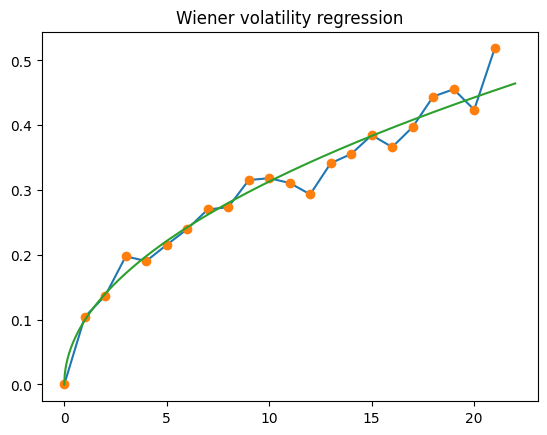

In [40]:
def y_regression(t, coeff):
    return coeff * np.sqrt(t)

sum_t_i = 0
sum_sqrt_t_i_y_i = 0
for i in range(23):
    sum_t_i += i
    sum_sqrt_t_i_y_i += np.sqrt(i) * experiments_volatility[i] 

coeff = sum_sqrt_t_i_y_i / sum_t_i
print('coeff', coeff)

t_values = np.linspace(0, 23, 1000)
y_values = y_regression(t_values, coeff)
plt.plot(experiments_volatility)
plt.plot(experiments_volatility, 'o')
plt.plot(t_values, y_values)
plt.title(label='Wiener volatility regression')
plt.show()